<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/tutorials/day05_tutorial_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 5 Tutorial: K Nearest Neighbors (KNN)
This tutorial introduces the scikit learn library and explores how to use the knn classifier.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# This is the classic iris dataset (1936)
# Read more: https://archive.ics.uci.edu/ml/datasets/Iris
file_link = 'https://drive.google.com/uc?export=download&id=1UZTj2GjSTFiBqAeOXiroTxviy_zLxLpL'
df = pd.read_csv(file_link)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Terminology
The data set has 150 rows, or examples, each with 4 columns, or attributes. The last column, class, indicates the class label (or target variable). This data set has 3 distinct classes, as shown below.

In [3]:
# Turn the class labels into numbers for future use
df['class'].value_counts()


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

### Naming conventions
In machine learning, a common convention is to use the variable X to hold the attribtues (or data) and y to hold the labels. It's often helpful to have these as numeric numpy arrays.

A common mistake is to include the labels as part of the data.

In [4]:
# Convert the numeric data into a numpy array
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
print('data:', X.shape)
print(X)

# Convert the class labels into numbers
y = df['class'].astype('category').cat.codes.values
print('\nlabels:', y.shape)
y

data: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

### We can plot one attribute of the data vs another, e.g., petal length vs petal width, and use color to indicate the class label.

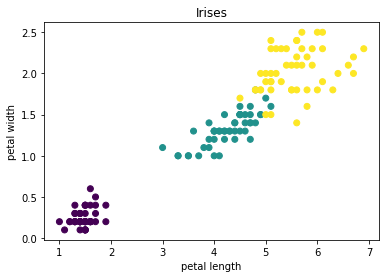

In [5]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Irises')
plt.show()

## For a much more impressive visualization, we can use the seaborn library, which wraps matplotlib with higher-level functionality.

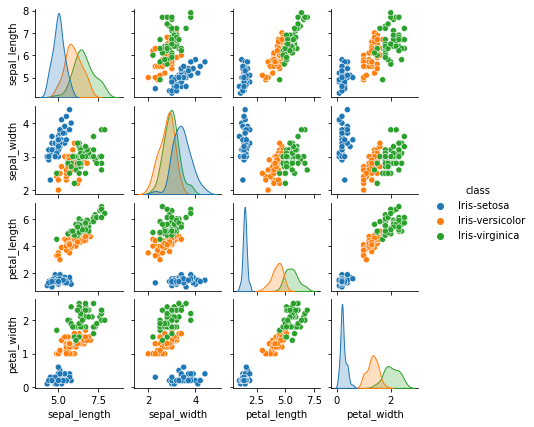

In [6]:
import seaborn as sns;
sns.pairplot(df, hue='class', height=1.5);

# Scikit Learn

Step 1 for classification is generally to split your data and labels into random training and testing sets.

To keep results reproducible, it's usually a good idea to set the random state (or random seed) to a known value so that we get the same results every time.

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (75, 4)
ytrain.shape: (75,)
Xtest.shape: (75, 4)
ytest.shape: (75,)


Next we make a new KNN classifier, specifying two important parameters, number of neighbors (k) and distance metric, and fit the model to our data.

With KNN, the fitting step doesn't really do much, since KNN is a "lazy learner," but with other types of models, this step can take a while.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain, ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Once we have a fit model, then we can use it to predict the class label of new examples.

In [9]:
preds = model.predict(Xtest)
preds

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1], dtype=int8)

By comparing the model predictions on the test set vs the actual ("ground truth") labels, we can measure the model accuracy.

In [10]:
ytest

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1], dtype=int8)

In [11]:
preds == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

There's a built-in function to help.

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, preds)


0.9066666666666666

## Confusion Matrix
While the accuracy is an important number, we can get more insight from a confusion matrix, which shows the specific kinds of errors our model is making. The matrix rows indicate the actual ("ground truth") class, and the columns indicate the predicted class.

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, preds)
print(cm)

[[21  0  0]
 [ 0 28  2]
 [ 0  5 19]]


A confusion matrix is generally better visualized as a heatmap.

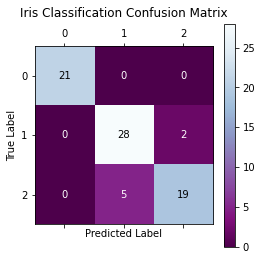

In [14]:
label_list = model.classes_

plt.matshow(cm, cmap='BuPu_r')
plt.colorbar()
plt.grid(False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(label_list)), label_list)
plt.yticks(np.arange(len(label_list)), label_list)
plt.title('Iris Classification Confusion Matrix', pad=20)

# Add text to show counts in heatmap.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    # Make sure text color will show up
    color = 'black'
    if cm[i, j] < 0.4 * cm.max():
      color = 'white'
    plt.text(j, i, cm[i, j], ha="center", va="center", color=color)
plt.show()